<a href="https://colab.research.google.com/github/kkktim/Colab/blob/master/Ch03.%20%EB%94%A5%EB%9F%AC%EB%8B%9D%20%EC%8B%A4%EC%8A%B5%20/%206_%EB%94%A5%EB%9F%AC%EB%8B%9D_RNN_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
  날짜 : 2022/05/12
  이름 : 강태호
  내용 : 딥러닝 RNN 모델 실습
"""
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense
from tensorflow.keras.models import Sequential

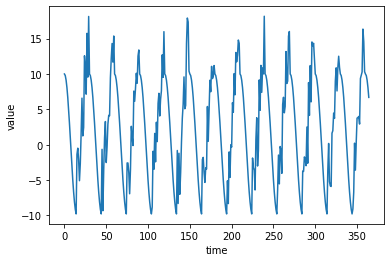

In [7]:
#데이터 생성(시계열)
time = np.arange(365)
month_time = (time % 30) / 30
# month_time

time_series = 10 * np.where(month_time < 0.5, 
                            np.cos(2 * np.pi * month_time), 
                            np.cos(2 * np.pi * month_time) + np.random.random(365))
plt.xlabel('time')
plt.ylabel('value')
plt.plot(np.arange(0, 365), time_series[:365])

In [8]:
#데이터 전처리
def make_sequence(time_series, n):
  train_data, train_label = [], []

  for i in range(len(time_series)):
    t = time_series[i:(i+n)]

    if(i+n) < len(time_series):
      train_data.append(t)
      train_label.append(time_series[i+n])
    else:
      break
    
  return np.array(train_data), np.array(train_label)

train_data, train_label = make_sequence(time_series, 10)
train_label

array([-5.00000000e+00, -6.69130606e+00, -8.09016994e+00, -9.13545458e+00,
       -9.78147601e+00, -1.36003584e+00, -4.90220900e-01, -2.11053440e+00,
       -5.08484236e+00, -2.62189850e+00,  1.61590936e+00,  6.58388521e+00,
        1.24532997e+00,  2.44798476e+00,  1.25721512e+01,  1.09699814e+01,
        7.14746499e+00,  1.57456612e+01,  9.56061970e+00,  1.81295525e+01,
        1.00000000e+01,  9.78147601e+00,  9.13545458e+00,  8.09016994e+00,
        6.69130606e+00,  5.00000000e+00,  3.09016994e+00,  1.04528463e+00,
       -1.04528463e+00, -3.09016994e+00, -5.00000000e+00, -6.69130606e+00,
       -8.09016994e+00, -9.13545458e+00, -9.78147601e+00, -6.52899602e-01,
       -9.33194017e+00, -3.54343024e+00,  9.93031092e-01,  3.27748904e+00,
       -2.51896328e+00, -3.33088928e-01,  2.91495725e+00,  4.15746997e+00,
        4.09016316e+00,  9.48213204e+00,  1.22085098e+01,  1.43068718e+01,
        1.16822504e+01,  1.53696267e+01,  1.00000000e+01,  9.78147601e+00,
        9.13545458e+00,  

In [11]:
#데이터 변환
train_data = train_data.reshape(-1, 10, 1)   #자동 x 10 x 1
train_label = train_label.reshape(-1, 1)
train_data.shape

(355, 10, 1)

In [16]:
#학습데이터, 테스트데이터
_train_data = train_data[:300]
_train_label = train_label[:300]

_test_data = train_data[300:]
_test_label = train_label[300:]

_train_data.shape

(300, 10, 1)

In [29]:
#모델설계
model = Sequential()
model.add(SimpleRNN(units=32, activation='tanh', input_shape=(10, 1)))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 32)                1088      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [30]:
#모델설정
model.compile(optimizer='Adam', loss='mse', metrics=['acc'])

In [31]:
#모델학습
model.fit(_train_data, _train_label, epochs=1000)

Epoch 1/1000
10/10 [==============================] - 1s 5ms/step - loss: 61.1573 - acc: 0.0000e+00
Epoch 2/1000
10/10 [==============================] - 0s 5ms/step - loss: 52.8606 - acc: 0.0000e+00
Epoch 3/1000
10/10 [==============================] - 0s 5ms/step - loss: 46.0358 - acc: 0.0000e+00
Epoch 4/1000
10/10 [==============================] - 0s 5ms/step - loss: 40.5725 - acc: 0.0000e+00
Epoch 5/1000
10/10 [==============================] - 0s 7ms/step - loss: 36.5978 - acc: 0.0000e+00
Epoch 6/1000
10/10 [==============================] - 0s 5ms/step - loss: 33.6508 - acc: 0.0000e+00
Epoch 7/1000
10/10 [==============================] - 0s 6ms/step - loss: 31.0041 - acc: 0.0000e+00
Epoch 8/1000
10/10 [==============================] - 0s 5ms/step - loss: 28.3327 - acc: 0.0000e+00
Epoch 9/1000
10/10 [==============================] - 0s 5ms/step - loss: 25.5161 - acc: 0.0000e+00
Epoch 10/1000
10/10 [==============================] - 0s 6ms/step - loss: 22.6137 - acc: 0.0000e+00

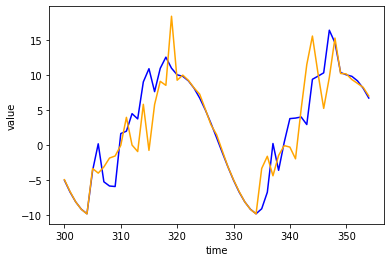

In [32]:
#모델 테스트 시각화
result = model.predict(_test_data)

result_range = np.arange(len(_train_label), len(_train_label) + len(result))

plt.xlabel('time')
plt.ylabel('value')

plt.plot(result_range, _test_label, color='blue', label='label')
plt.plot(result_range, result, color='orange', label='result')
plt.show()